<a href="https://colab.research.google.com/github/davidias0090/ml_finished_projects/blob/main/Davi_Dias_Exerc%C3%ADcios_Pr%C3%A1ticos_Churn_(simplificado).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Sobre o notebook

Esse notebook contém diversos desafios envolvendo os aprendizados de cada aula. É um notebook construído com o enunciado de cada desafio e com espaço para construir e executar suas soluções. Se for necessário adicionar mais células de código para solucionar o desafio, fique à vontade para acrescentar.

### Desafio 1:

A primeira etapa em um projeto de machine learning é a obtenção de dados. A partir dessa obtenção, podemos fazer a leitura dos dados para se construir um modelo. Como tarefa inicial, faça a leitura da base de dados e verifique a presença de dados nulos.

In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/davidias0090/ml_finished_projects/main/churn%20-%20churn.csv.csv' # Use raw file URL for direct download
df = pd.read_csv(url)
df.head()

,id_cliente,score_credito,pais,sexo_biologico,idade,anos_de_cliente,saldo,servicos_adquiridos,tem_cartao_credito,membro_ativo,salario_estimado,churn
0,15634602,619,França,Mulher,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Espanha,Mulher,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,França,Mulher,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,França,Mulher,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Espanha,Mulher,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id_cliente           10000 non-null  int64  
 1   score_credito        10000 non-null  int64  
 2   pais                 10000 non-null  object 
 3   sexo_biologico       10000 non-null  object 
 4   idade                10000 non-null  int64  
 5   anos_de_cliente      10000 non-null  int64  
 6   saldo                10000 non-null  float64
 7   servicos_adquiridos  10000 non-null  int64  
 8   tem_cartao_credito   10000 non-null  int64  
 9   membro_ativo         10000 non-null  int64  
 10  salario_estimado     10000 non-null  float64
 11  churn                10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


### Desafio 2

Após a leitura dos dados, é importante conhecer os dados, checando inconsistências e entendendo o comportamento de cada uma das colunas. Nesta tarefa, faça uma análise exploratória utilizando gráficos para as **variáveis categóricas** da base de dados, incluindo a **variável alvo** churn. Para essas variáveis, pode ser utilizado gráficos de barras para fazer a contagem das categorias e fazer um agrupamento por cores de acordo com as categorias da variável alvo.

In [12]:
import plotly.express as px

In [13]:
px.histogram(df, x = 'pais', text_auto = True, color = 'churn', barmode = 'group')

In [14]:
px.histogram(df, x = 'sexo_biologico', text_auto = True, color = 'churn', barmode = 'group')

In [15]:
px.histogram(df, x = 'tem_cartao_credito', text_auto = True, color = 'churn', barmode = 'group')

In [17]:
px.histogram(df, x = 'membro_ativo', text_auto = True, color = 'churn', barmode = 'group')

### Desafio 3

Depois de explorar as variáveis categóricas, chegou a vez das **variáveis numéricas**. Construa gráficos de distribuição como boxplots ou histogramas para analisar o comportamento dos valores numéricos e checar se existem valores inconsistentes.

In [19]:
px.box(df, x = 'score_credito', color = 'churn')

In [20]:
px.box(df, x = 'idade', color = 'churn')

In [21]:
px.box(df, x = 'anos_de_cliente', color = 'churn')

In [22]:
px.box(df, x = 'saldo', color = 'churn')

In [23]:
px.box(df, x = 'servicos_adquiridos', color = 'churn')

In [24]:
px.box(df, x = 'salario_estimado', color = 'churn')

### Desafio 4:

Para utilizar os dados nos algoritmos de Machine Learning, precisamos informar quais são as variáveis explicativas e qual é a variável alvo. Neste desafio, faça a separação da base de dados de churn entre as variáveis explicativas, armazenando em uma variável x e a variável alvo em y.


In [25]:
X = df.drop('churn', axis = 1)
y = df['churn']

### Desafio 5:

Variáveis categóricas que estejam em formato de texto não podem ser utilizadas diretamente nos modelos de Machine Learning. Neste desafio, faça a transformação das variáveis categóricas para formato numérico usando o [`OneHotEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html), utilizando o parâmetro `drop='if_binary'` caso alguma variável tenha apenas 2 categorias.

In [27]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [28]:
#transforma apenas x em features
onehot = OneHotEncoder(drop = 'if_binary')

transformer = make_column_transformer((onehot, ['pais','sexo_biologico','tem_cartao_credito','membro_ativo']),

                                      remainder='passthrough',
                                      sparse_threshold=0
)


linhas = transformer.fit_transform(X)
colunas = transformer.feature_names_in_
x_onehot = transformer.get_feature_names_out()


### Desafio 6:

A variável alvo, como é do tipo categórica, também precisa passar por um tratamento similar às variáveis explicativas categóricas para que possa ser usada nos algoritmos. Nessa tarefa, utilize o método [`LabelEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) para fazer a transformação da variável churn.

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
label = LabelEncoder()
y = label.fit_transform(y)
y

array([1, 0, 1, ..., 1, 1, 0])

In [31]:
y = pd.DataFrame(y, columns = ['inadimplencia'])
print(y)

      inadimplencia
0                 1
1                 0
2                 1
3                 0
4                 0
...             ...
9995              0
9996              0
9997              1
9998              1
9999              0

[10000 rows x 1 columns]


### Desafio 7:

A separação dos dados entre conjunto de treinamento e teste é essencial para compreender se um modelo está conseguindo aprender os padrões e generalizar para novos dados. Nesta tarefa, faça a divisão da base de dados entre treinamento e teste de forma estratificada.

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(linhas , y, test_size=0.25, random_state=42, stratify=y)

### Desafio 8:

Um modelo de base é muito importante para definir um critério de comparação para modelos mais complexos. Nesta etapa, crie um modelo de base com o `DummyClassifier` e encontre a taxa de acerto com o método `score`.

In [35]:
from sklearn.dummy import DummyClassifier


In [36]:
dummy_stratified = DummyClassifier()
dummy_stratified.fit(X_train, y_train)
acuracia_dummy = dummy_stratified.score(X_test, y_test)

print("Acuracia Dummy: ", (acuracia_dummy*100), "%")

Acuracia Dummy:  79.64 %


### Desafio 9:

A árvore de decisão é um algoritmo que faz as classificações a partir de decisões simples tomadas a partir dos dados. Temos que tomar certo cuidado para não utilizar uma profundidade muito grande, porque isso pode provocar um sobreajuste do modelo aos dados de treinamento. Neste desafio, crie um modelo de árvore de decisão com o parâmetro `max_depth=4`, avalie o desempenho do modelo nos dados de teste e visualize as decisões da árvore usando o método `plot_tree`.

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

In [42]:
model = DecisionTreeClassifier(random_state=42, max_depth=4)  # Cria uma instância do modelo de árvore de decisão

# Treinando o modelo com os dados de treinamento
model.fit(X_train, y_train) # Treina o modelo usando os dados de treinamento (train_x, train_y)

# Fazendo previsões para o conjunto de teste
previsoes_dt = model.predict(X_test)# Utiliza o modelo treinado para fazer previsões para o conjunto de teste (test_x)

acuracia_dtc_score = accuracy_score(y_test, previsoes_dt)
print("Acuracia Modelo: ", (acuracia_dtc_score) * 100, "%")

Acuracia Modelo:  85.48 %


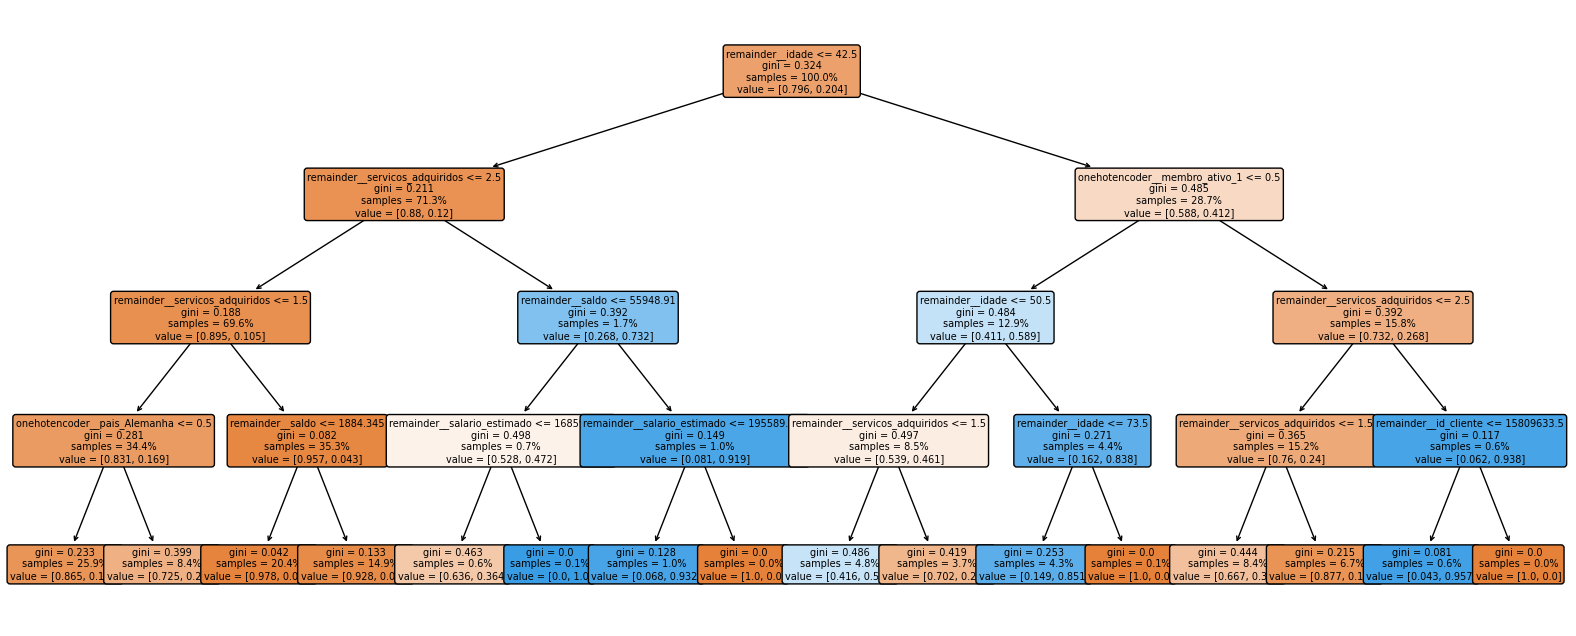

In [73]:
#plotar arvore usando plot tree
plt.figure(figsize=(20,8))
plot_tree(model, feature_names=x_onehot,filled=True, fontsize=7, proportion = True, rounded= True)
plt.show()

### Desafio 10:

A normalização de dados é uma tarefa importante para manter todos os valores numéricos em uma mesma escala e garantir que todas as características tenham o mesmo impacto no modelo. Nesta tarefa, faça a normalização da base de dados usando o [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html).


In [74]:
from sklearn.preprocessing import MinMaxScaler

In [75]:
#normalização usando MinMaxScaler
scaler = MinMaxScaler()
X_normalizado = scaler.fit_transform(linhas)

### Desafio 11:

Com os dados normalizados, podemos utilizar o modelo KNN, que faz cálculos de distância para encontrar os vizinhos mais próximos. Nesta atividade, crie um modelo KNN usando o [`KNeighborsClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) com os dados normalizados e avalie o desempenho nos dados de teste, também normalizados.

In [76]:
from sklearn.neighbors import KNeighborsClassifier

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X_normalizado, y, test_size=0.25, random_state= 42 , stratify=y)

#Instanciar o modelo KNN
knn = KNeighborsClassifier(metric='euclidean')
#Treinar o modelo
knn.fit(X_train, y_train)

#Testar o Modelo
previsoes_knn = knn.predict(X_test)
acuracia_knn = knn.score(X_test, y_test) * 100
print("Acuracia KNN: ", (acuracia_knn), "%")

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Acuracia KNN:  81.28 %


### Desafio 12:

Após a construção dos modelos, é o momento de comparar os resultados e selecionar aquele que tem o melhor desempenho. Neste desafio, avalie a taxa de acerto dos modelos `DummyClassifier`, `DecisionTreeClassifier` e `KNeighborsClassifier` que foram construídos nos outros desafios utilizando o método `score` e depois armazene o modelo com melhor acurácia em um arquivo `pickle`. Os modelos de transformação também precisam ser armazenados, que é o caso do `OneHotEncoder` e do `MinMaxScaler`, caso o KNN tenha o melhor desempenho.

In [81]:
print("Acuracia Dummy: ", (acuracia_dummy*100), "%")
print("Acuracia Modelo Arvore Decisão: ", (acuracia_dtc_score*100) , "%")
print("Acuracia KNN: ", (acuracia_knn), "%")

print("O melhor modelo é o DecisionTreeClassifier")

import pickle
with open('melhor_modelo.pkl', 'wb') as file:
  pickle.dump(model , file)


Acuracia Dummy:  79.64 %
Acuracia Modelo Arvore Decisão:  85.48 %
Acuracia KNN:  81.28 %
O melhor modelo é o DecisionTreeClassifier


### Desafio 13:

Depois que o modelo está em produção, já pode ser utilizado para classificar novos dados. Neste desafio, faça a leitura dos arquivos `pickle` dos modelos que foram salvos no desafio anterior e utilize os modelos para fazer a previsão do seguinte registro:

```
novo_dado = pd.DataFrame({
    'score_credito': [850],
    'pais':['França'],
    'sexo_biologico':['Homem'],
    'idade': [27],
    'anos_de_cliente': [3],
    'saldo': [56000],
    'servicos_adquiridos': [1],
    'tem_cartao_credito': ['sim'],
    'membro_ativo': ['sim'],
    'salario_estimado': [85270.00]
})
```


In [83]:
with open('melhor_modelo.pkl', 'rb') as file:
    dtc_carregado = pickle.load(file)

In [86]:
novo_dado = pd.DataFrame({
    'score_credito': [850],
    'pais':['Franca'],
    'sexo_biologico':['Homem'],
    'idade': [27],
    'anos_de_cliente': [3],
    'saldo': [56000],
    'servicos_adquiridos': [1],
    'tem_cartao_credito': ['sim'],
    'membro_ativo': ['sim'],
    'salario_estimado': [85270.00]
})